
## $\color{blue}{\text{I got the data from National Risk Index for Natural Hazards. }}$
## $\color{blue}{\text{This dataset is used by industry to model risk loss }}$

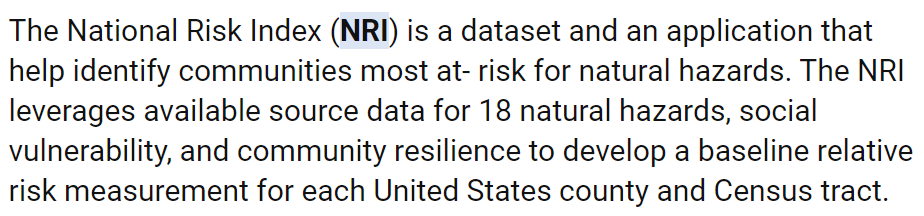>


## $\color{blue}{\text{This is the map of earthquake exposures, Darker gradiant areas get more earthquake damage }}$


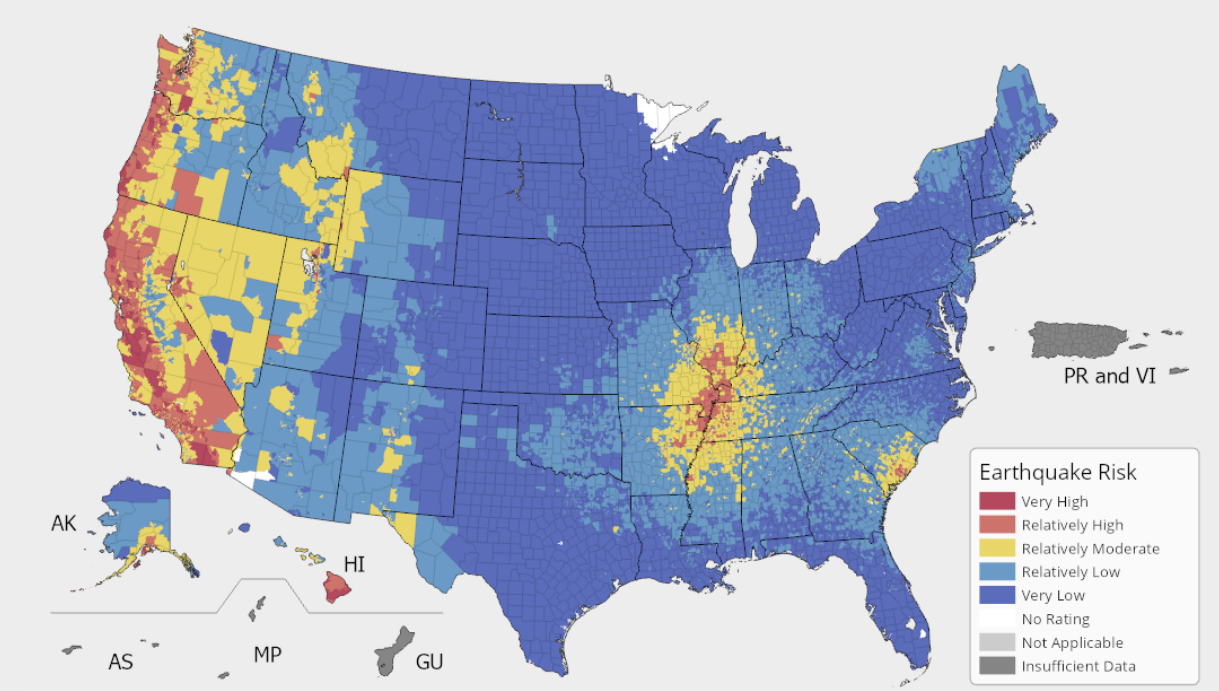


## $\color{blue}{\text{we are only concerned with builidngs exposures, frequency, and HLR }}$


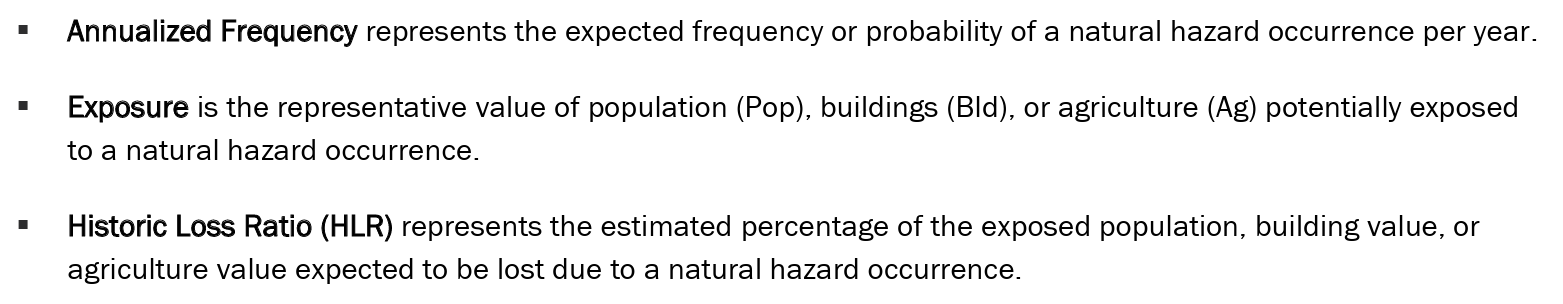


## Now I'll load the data

In [6]:
import pandas as pd
df = pd.read_csv("Exposure data.csv")

## This is the dataframe

In [7]:
df.head()

,OID_,NRI_ID,STATE,STATEABBRV,STATEFIPS,COUNTY,COUNTYTYPE,COUNTYFIPS,STCOFIPS,POPULATION,...,WNTW_EALS,WNTW_EALR,WNTW_ALRB,WNTW_ALRP,WNTW_ALRA,WNTW_ALR_NPCTL,WNTW_RISKV,WNTW_RISKS,WNTW_RISKR,NRI_VER
0,1,C01001,Alabama,AL,1,Autauga,County,1,1001,58764,...,15.784587,Very Low,2.687716e-07,7.410082e-09,8.725777e-06,10.461158,8494.906508,12.217626,Very Low,March 2023
1,2,C01003,Alabama,AL,1,Baldwin,County,3,1003,231365,...,56.205509,Relatively Moderate,1.268231e-09,2.287120e-08,1.548360e-07,13.339523,65619.701638,52.083996,Relatively Low,March 2023
2,3,C01005,Alabama,AL,1,Barbour,County,5,1005,25160,...,18.632002,Relatively Low,5.788050e-07,2.347236e-08,7.606598e-07,16.125039,15501.730335,19.535476,Very Low,March 2023
3,4,C01007,Alabama,AL,1,Bibb,County,7,1007,22239,...,13.308573,Very Low,9.014679e-07,1.270300e-08,1.202015e-05,16.991643,7496.186940,11.104041,Very Low,March 2023
4,5,C01009,Alabama,AL,1,Blount,County,9,1009,58992,...,23.645930,Relatively Low,5.268425e-07,1.482016e-08,2.002965e-07,12.039616,17175.160729,21.444480,Very Low,March 2023


### Here We are concerned with Risk exposures of Earthquake I.E. 'ERQK_RISKV' & 'ERQK_RISKS'

In [8]:
risk_columns = [col for col in df.columns if 'erqk' in col.lower()]
print("Columns containing 'risk':", risk_columns)


Columns containing 'risk': ['ERQK_EVNTS', 'ERQK_AFREQ', 'ERQK_EXP_AREA', 'ERQK_EXPB', 'ERQK_EXPP', 'ERQK_EXPPE', 'ERQK_EXPT', 'ERQK_HLRB', 'ERQK_HLRP', 'ERQK_HLRR', 'ERQK_EALB', 'ERQK_EALP', 'ERQK_EALPE', 'ERQK_EALT', 'ERQK_EALS', 'ERQK_EALR', 'ERQK_ALRB', 'ERQK_ALRP', 'ERQK_ALR_NPCTL', 'ERQK_RISKV', 'ERQK_RISKS', 'ERQK_RISKR']


## Now I'll try to find exposures values pertainint to buildings

In [12]:
df1 = df[["STATE","COUNTY","POPULATION", 'ERQK_AFREQ','ERQK_EALB', 'ERQK_RISKV', 'ERQK_RISKS', 'ERQK_RISKR' ]]

## This below df contains Earthquake risk values 

In [13]:
df1

,STATE,COUNTY,POPULATION,ERQK_AFREQ,ERQK_EALB,ERQK_RISKV,ERQK_RISKS,ERQK_RISKR
0,Alabama,Autauga,58764,0.000431,156866.5,225054.128077,57.079224,Very Low
1,Alabama,Baldwin,231365,0.000338,353127.5,469517.927270,69.169583,Relatively Low
2,Alabama,Barbour,25160,0.000227,57941.0,110215.770452,44.002545,Very Low
3,Alabama,Bibb,22239,0.000790,173482.2,287537.327227,61.692650,Very Low
4,Alabama,Blount,58992,0.000817,384559.8,590351.881805,73.083042,Relatively Low
...,...,...,...,...,...,...,...,...
3226,Puerto Rico,Yabucoa,30397,0.007808,2041244.3,NaN,NaN,Insufficient Data
3227,Puerto Rico,Yauco,34151,0.007230,2586263.7,NaN,NaN,Insufficient Data
3228,Virgin Islands,St. Croix,40913,0.008000,5350052.7,NaN,NaN,Insufficient Data
3229,Virgin Islands,St. John,3882,0.008000,1266970.1,NaN,NaN,Insufficient Data


In [15]:
df2 = df1.copy().dropna()

## Lets see which counties get the most Earthquake. Counties that get most Earthquakes don't nessesarily have to get most severe earthquakes 

In [44]:
df2.sort_values('ERQK_AFREQ', ascending=False).head(10)

,STATE,COUNTY,POPULATION,ERQK_AFREQ,ERQK_EALB,ERQK_RISKV,ERQK_RISKS,ERQK_RISKR
68,Alaska,Aleutians West,5168,0.061974,1872887.6,3.177505e+06,89.850461,Relatively Low
67,Alaska,Aleutians East,3374,0.034224,250988.7,4.950300e+05,69.933185,Relatively Low
90,Alaska,Prince of Wales-Hyder,5714,0.024534,89531.7,1.580758e+05,50.524976,Very Low
82,Alaska,Kodiak Island,13076,0.021542,6218194.3,1.129085e+07,95.386573,Relatively Moderate
91,Alaska,Sitka,8434,0.018117,1278368.9,2.034845e+06,86.827871,Relatively Low
72,Alaska,Chugach,7011,0.015616,806646.2,1.310965e+06,82.023544,Relatively Low
80,Alaska,Kenai Peninsula,58731,0.015529,17128478.2,2.797246e+07,97.200127,Relatively Moderate
71,Alaska,Bristol Bay,843,0.015081,59580.1,7.162499e+04,37.957366,Very Low
84,Alaska,Lake and Peninsula,1472,0.014170,127964.0,2.367718e+05,57.938276,Very Low
78,Alaska,Hoonah-Angoon,2313,0.013079,382135.5,6.542623e+05,74.482978,Relatively Low


## Now lets see the counties with most Earthquake building damege. Seeing Caliornia makes sense because California counties has highest GDP and California is Earthquake prone 

In [26]:
df2.sort_values('ERQK_EALB', ascending=False).head(10)

,STATE,COUNTY,POPULATION,ERQK_AFREQ,ERQK_EALB,ERQK_RISKV,ERQK_RISKS,ERQK_RISKR
205,California,Los Angeles,10005712,0.009825,2.658011e+09,5.179356e+09,100.000000,Very High
229,California,Santa Clara,1934625,0.009827,8.740066e+08,1.333520e+09,99.968183,Very High
187,California,Alameda,1678284,0.009893,8.101476e+08,1.333065e+09,99.936367,Very High
222,California,San Bernardino,2179979,0.005566,7.237274e+08,1.322750e+09,99.904550,Very High
216,California,Orange,3183647,0.008993,6.729099e+08,1.183371e+09,99.872733,Very High
219,California,Riverside,2416838,0.007117,6.181219e+08,1.145226e+09,99.840916,Very High
2970,Washington,King,2268178,0.006239,4.873631e+08,7.901145e+08,99.809100,Very High
193,California,Contra Costa,1165466,0.009703,4.100557e+08,6.291879e+08,99.777283,Very High
227,California,San Mateo,763661,0.009557,2.926637e+08,4.289900e+08,99.713649,Relatively High
223,California,San Diego,3295981,0.007419,2.845363e+08,4.927618e+08,99.745466,Relatively High


### The Above counties in Alaska get the most Earthquakes. This is interesting because I thought California would be top.
### Alaska & California are both on the ring of fire so it makese sense 

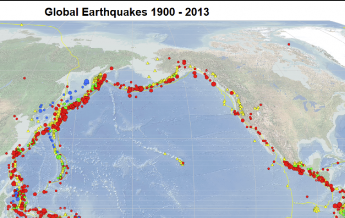

## Now Lets see Easrthquake Risk Rating distribution for all states

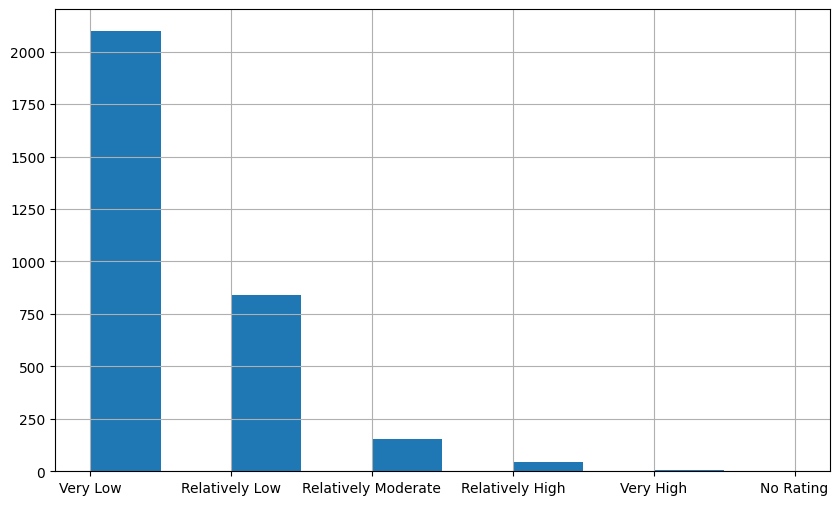

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6)) 
df2.ERQK_RISKR.hist()
plt.show()

### In the Above plot you can see that only a fraction of US counties have high risk

### Now lets see the same risk ratings grouped by state

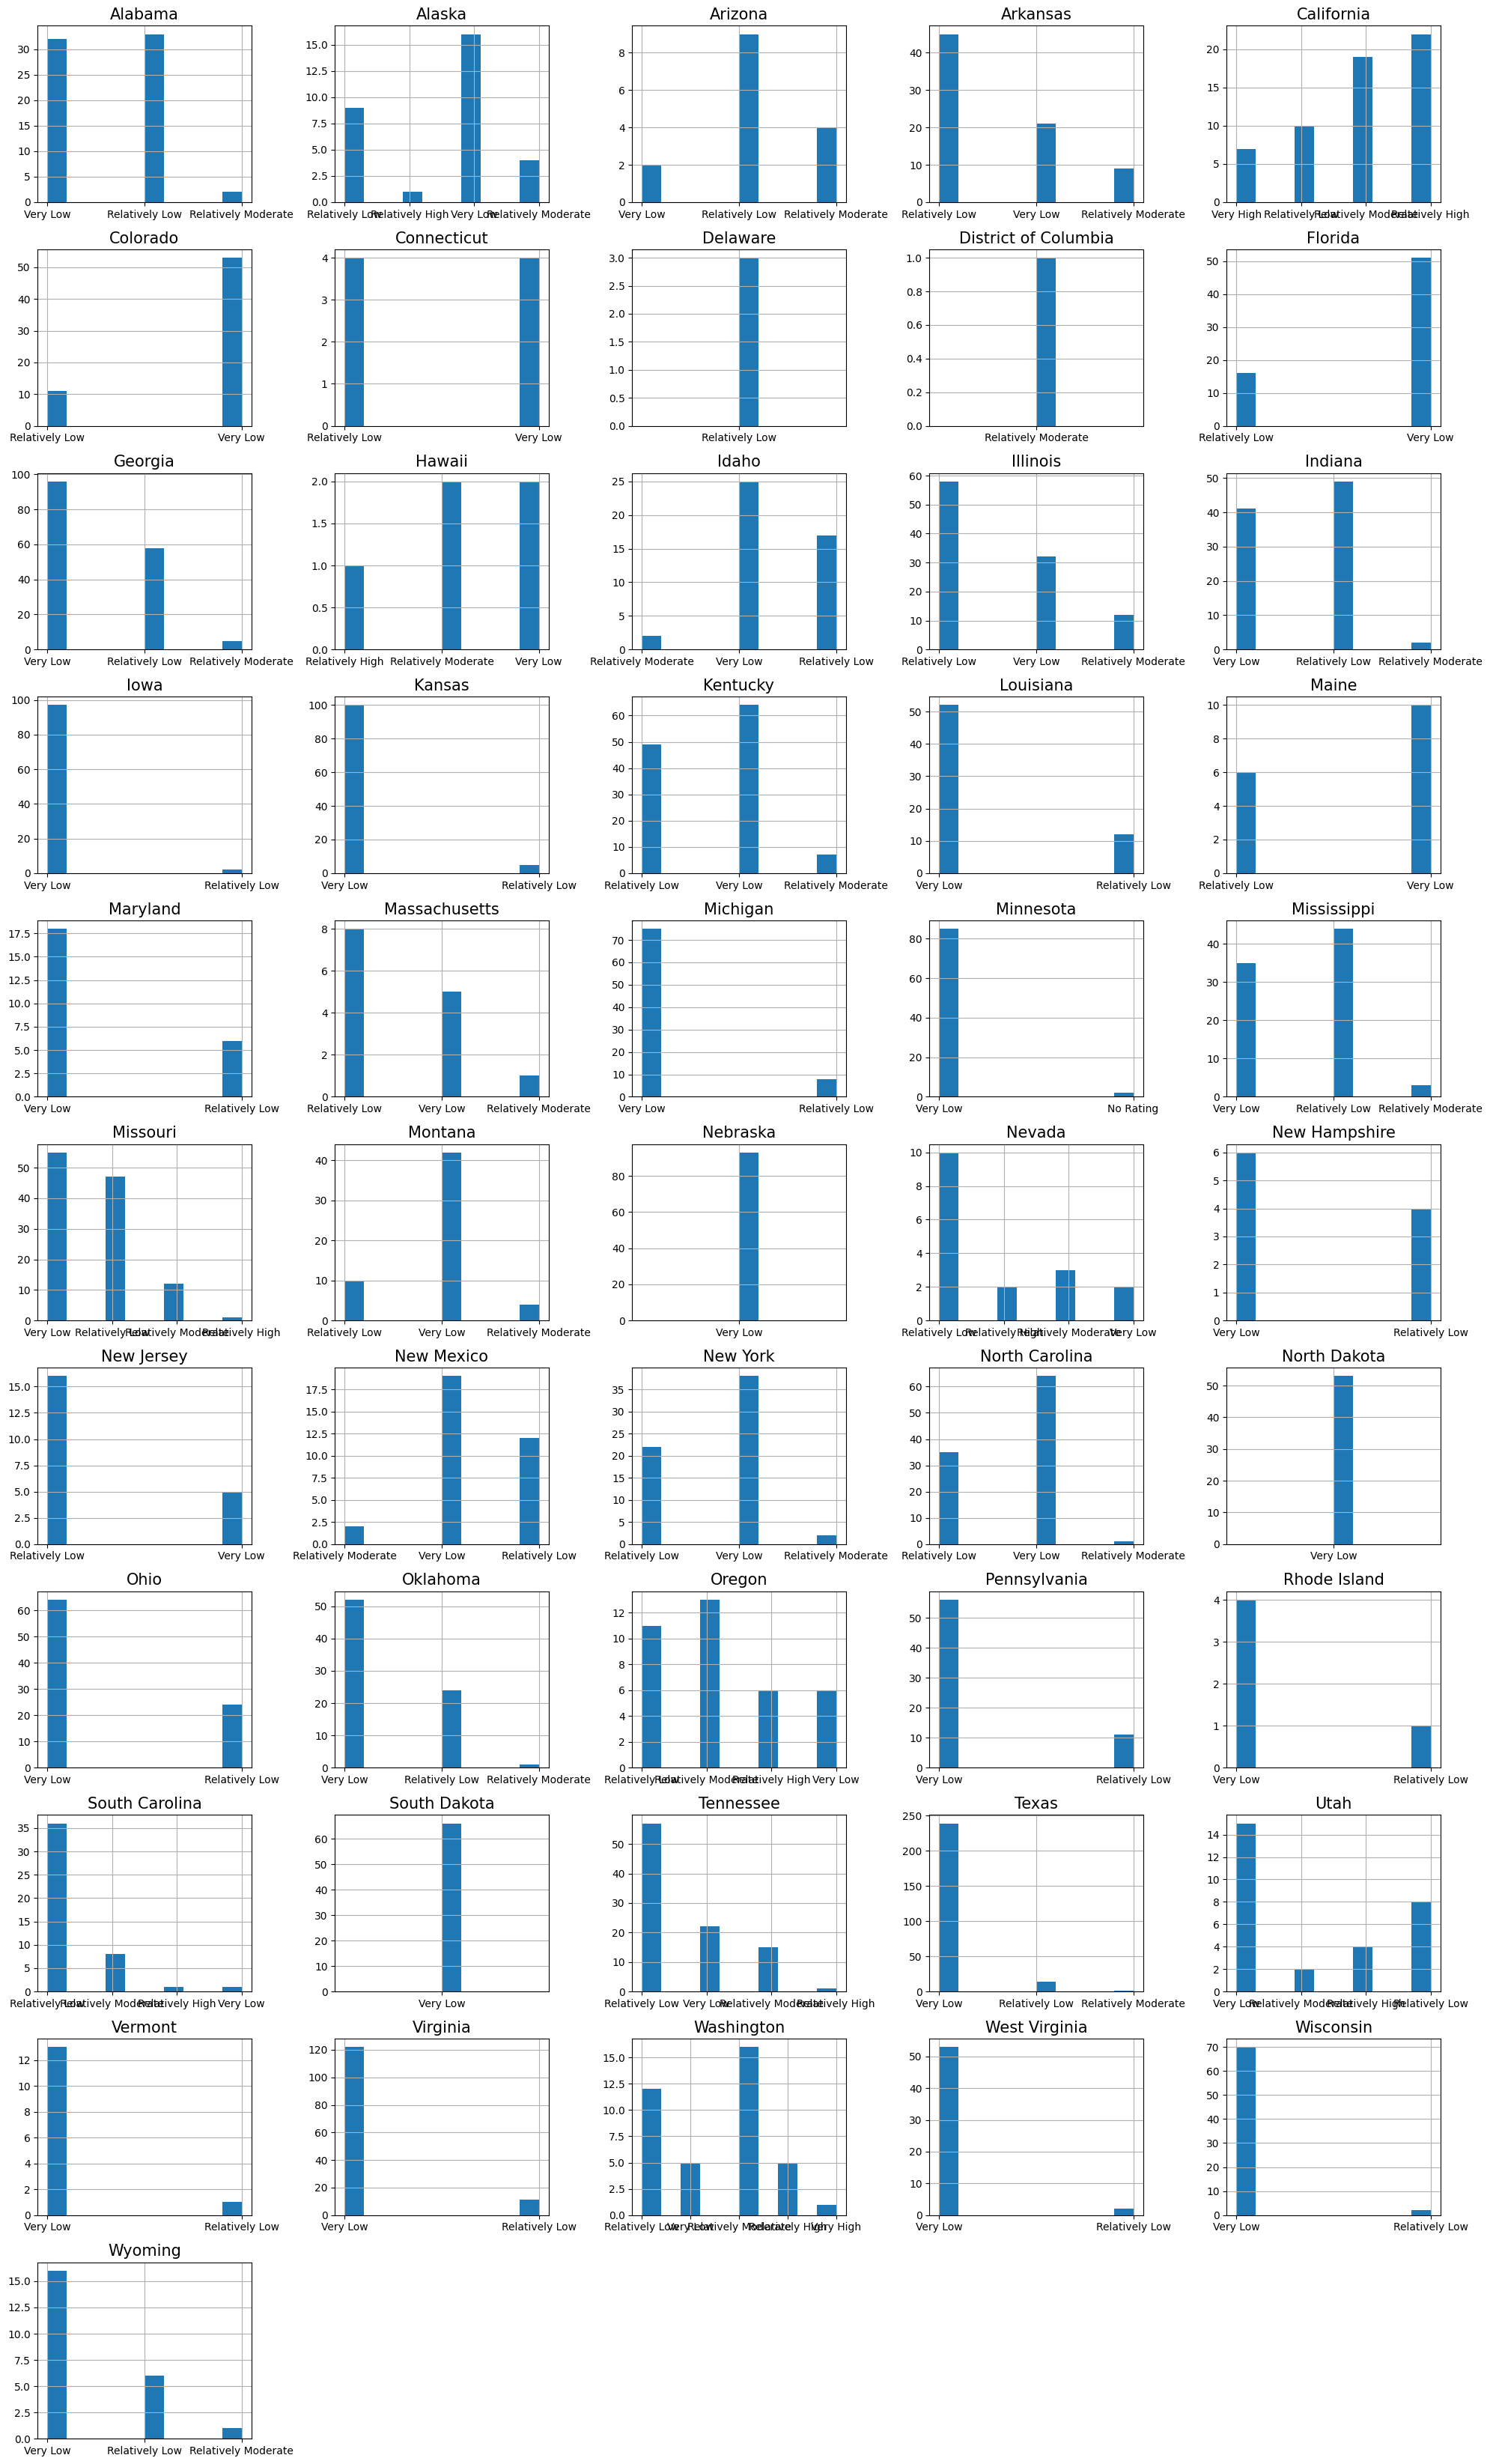

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import math
states = df2['STATE'].unique()
n_states = len(states)

states_per_row = 5
n_rows = math.ceil(n_states / states_per_row)

plt.figure(figsize=(4 * states_per_row, 3 * n_rows))

for i, state in enumerate(states):
    plt.subplot(n_rows, states_per_row, i + 1)
    subset = df2[df2['STATE'] == state]
    subset['ERQK_RISKR'].hist()
    plt.title(f'{state}', fontsize=15)
    plt.tight_layout()
plt.show()


## You can clearly see above that Caliornia is one of the only state that has high Risk rating for Earthquakes. Alaska also!

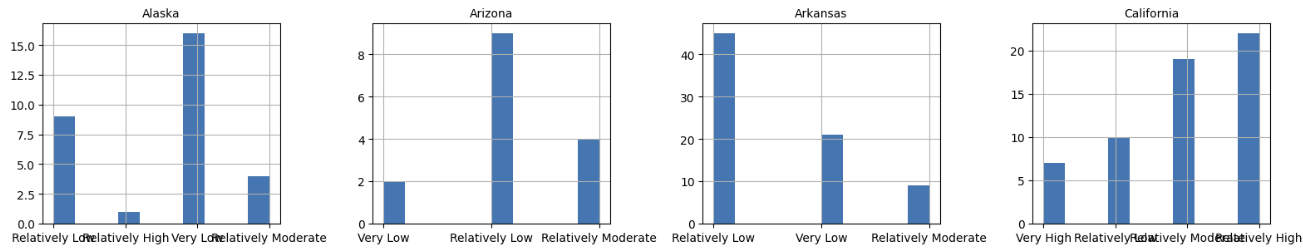

## This is how I'll model Earthquake risk using Monte Carlo Simulations 

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm

num_buildings = 1000  # num of buildings 
mean_value = 1000000
std_dev = np.sqrt(200000)  # Standard deviation, not variance

building_values = norm.rvs(loc=mean_value, scale=std_dev, size=num_buildings)

# Create a DataFrame if you're simulating data
data = pd.DataFrame({
    'County': np.random.choice(['County1', 'County2', 'County3'], size=num_buildings),
    'Building_Value': building_values,
    'Risk_Rating': np.random.choice(['Low', 'Medium', 'High'], size=num_buildings)
})


In [2]:
data

,County,Building_Value,Risk_Rating
0,County2,9.996179e+05,Medium
1,County3,9.998954e+05,Low
2,County3,9.998997e+05,High
3,County3,9.990224e+05,Medium
4,County3,9.993264e+05,High
...,...,...,...
995,County1,9.998915e+05,High
996,County2,1.000125e+06,Low
997,County2,1.000288e+06,Medium
998,County2,9.997814e+05,Medium


In [3]:
# Define a simple loss model as a function of risk rating
def estimate_loss(building_value, risk_rating):
    risk_loss_mapping = {'Low': 0.05, 'Medium': 0.10, 'High': 0.20}
    return building_value * risk_loss_mapping[risk_rating]

# Apply the loss model to each building
data['Estimated_Loss'] = data.apply(lambda x: estimate_loss(x['Building_Value'], x['Risk_Rating']), axis=1)


In [5]:
total_loss_by_county = data.groupby('County')['Estimated_Loss'].sum().round().astype(int)

average_loss_by_risk = data.groupby('Risk_Rating')['Estimated_Loss'].mean().round().astype(int)

print(total_loss_by_county)
print(average_loss_by_risk)


County
County1    35148603
County2    41500610
County3    38950104
Name: Estimated_Loss, dtype: int32
Risk_Rating
High      199996
Low        50001
Medium    100000
Name: Estimated_Loss, dtype: int32
